### Introduction
In this code, we perform data analysis and evaluate various machine learning models for the Telco Customer Churn dataset. We start by importing the necessary libraries and loading the dataset using Pandas. Let's go through the code step by step.

In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Importing the necessary libraries for deep learning
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [3]:
# Loading the dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df_original = df.copy()

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Overview of the Dataset
To gain an understanding of the dataset, we define a function called dataoveriew that provides an overview of the dataset, including the number of rows, number of features, feature names, missing values, and unique values.

In [5]:
pd.set_option('display.max_columns', None)

import plotly.express as px #for visualization


#Get overview of the data
def dataoveriew(df, message):
    print(f'{message}:n')
    print('Number of rows: ', df.shape[0])
    print("nNumber of features:", df.shape[1])
    print("nData Features:")
    print(df.columns.tolist())
    print("nMissing values:", df.isnull().sum().values.sum())
    print("nUnique values:")
    print(df.nunique())

dataoveriew(df, 'Overview of the dataset')

Overview of the dataset:n
Number of rows:  7043
nNumber of features: 21
nData Features:
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
nMissing values: 0
nUnique values:
customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### Handling Missing Values
Next, we check for missing values in the dataset and handle them accordingly. In this case, we drop rows with missing values and convert the 'TotalCharges' column to numeric format, filling any missing values with the median value.

In [7]:
# Checking for missing values
df.isnull().sum()

# Handling missing values
df = df.dropna()

In [8]:
# It can be observed that the TotalCharges has an object data type which means that it contains string components.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# Fill the missing values with the median value
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

### Exploratory Data Analysis (EDA)
To gain insights into the data, we plot histograms for each numerical feature in the dataset.

array([[<Axes: title={'center': 'SeniorCitizen'}>,
        <Axes: title={'center': 'tenure'}>],
       [<Axes: title={'center': 'MonthlyCharges'}>,
        <Axes: title={'center': 'TotalCharges'}>]], dtype=object)

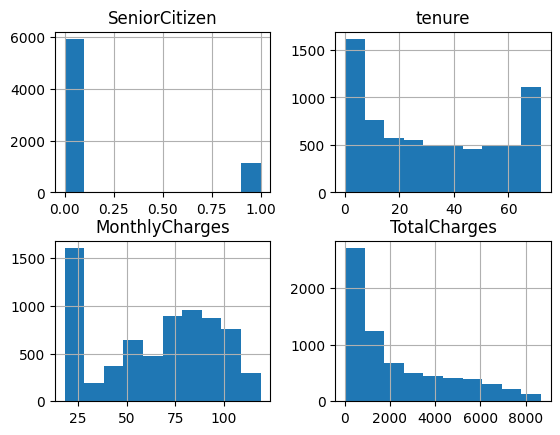

In [9]:
df.hist()

### Feature Encoding
We encode the categorical features in the dataset using one-hot encoding for features with more than two categories and binary encoding for binary features.

In [10]:
# The customerID column isn't useful as the feature is used for identification of customers.
df.drop(["customerID"], axis=1, inplace=True)

# Encode categorical features

# Defining the map function
def binary_map(feature):
    return feature.map({'Yes': 1, 'No': 0})

# Encoding target feature
df['Churn'] = df[['Churn']].apply(binary_map)

# Encoding gender category
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

# Encoding other binary categories
binary_list = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
df[binary_list] = df[binary_list].apply(binary_map)

# Encoding the other categorical features with more than two categories
df = pd.get_dummies(df, drop_first=True)

In [11]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


### Data Scaling
We perform feature scaling using the StandardScaler to ensure that all numerical features are on the same scale.

In [12]:
# StandardScaler

scaler = StandardScaler()
df[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])

### Correlation to determine the importnace of feature and how they relate to each other

In [13]:
corr = df.corr()
fig = px.imshow(corr,width=1000, height=1000)
fig.show()

### Splitting the Dataset
We split the dataset into training and testing sets using the train_test_split function from scikit-learn.

In [14]:
# Splitting the dataset into training and testing sets
X = df.drop(['Churn'], axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Training & Model Evaluation
We evaluate the performance of multiple machine learning models, including Logistic Regression, Decision Tree, Random Forest, Naive Bayes, and Support Vector Machine (SVM). We use accuracy, confusion matrix, and classification report as evaluation metrics.

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def modeling(alg, alg_name, params={}):
    model = alg(**params) #Instantiating the algorithm class and unpacking parameters if any
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    #Performance evaluation
    def print_scores(alg, y_true, y_pred):
        print(alg_name)
        acc_score = accuracy_score(y_true, y_pred)
        print("accuracy: ",acc_score)
     
        confusion = confusion_matrix(y_test, y_pred)
        print('Confusion Matrix:\n', confusion)
        report = classification_report(y_test, y_pred)
        print('Classification Report:\n', report)

    print_scores(alg, y_test, y_pred)
    return model

In [16]:
log_model = modeling(LogisticRegression, 'Logistic Regression')

Logistic Regression
accuracy:  0.8211497515968772
Confusion Matrix:
 [[934 102]
 [150 223]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409



In [17]:
svc_model = modeling(SVC, 'SVC Classification')

SVC Classification
accuracy:  0.8140525195173882
Confusion Matrix:
 [[953  83]
 [179 194]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.70      0.52      0.60       373

    accuracy                           0.81      1409
   macro avg       0.77      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [18]:
rf_model = modeling(RandomForestClassifier, "Random Forest Classification")

Random Forest Classification
accuracy:  0.794180269694819
Confusion Matrix:
 [[951  85]
 [205 168]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87      1036
           1       0.66      0.45      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409



In [19]:
dt_model = modeling(DecisionTreeClassifier, "Decision Tree Classification")

Decision Tree Classification
accuracy:  0.7260468417317246
Confusion Matrix:
 [[844 192]
 [194 179]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1036
           1       0.48      0.48      0.48       373

    accuracy                           0.73      1409
   macro avg       0.65      0.65      0.65      1409
weighted avg       0.73      0.73      0.73      1409



In [20]:
nb_model = modeling(GaussianNB, "Naive Bayes Classification")

Naive Bayes Classification
accuracy:  0.6657203690560681
Confusion Matrix:
 [[605 431]
 [ 40 333]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.58      0.72      1036
           1       0.44      0.89      0.59       373

    accuracy                           0.67      1409
   macro avg       0.69      0.74      0.65      1409
weighted avg       0.81      0.67      0.68      1409



In [21]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 0.01, 0.001]
}

# Create an SVC object
svc = SVC()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

# Evaluate the model on the testing set
accuracy = grid_search.score(X_test, y_test)
print("Test Accuracy: ", accuracy)

Best Parameters:  {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Best Accuracy:  0.7987223030381354
Test Accuracy:  0.8232789212207239


### Deep Learning Model
Additionally, we create a deep learning model using Keras. The model has multiple dense layers with dropout regularization to prevent overfitting.

In [22]:
# Creating a deep learning model using TensorFlow
model = tf.keras.models.Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20)

# Evaluating the model on the testing data
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test Accuracy:', test_acc)

Epoch 1/20
177/177 [==============================] - 1s 2ms/step - loss: 0.4601 - accuracy: 0.7762
Epoch 2/20
177/177 [==============================] - 0s 1ms/step - loss: 0.4381 - accuracy: 0.7943
Epoch 3/20
177/177 [==============================] - 0s 2ms/step - loss: 0.4293 - accuracy: 0.7989
Epoch 4/20
177/177 [==============================] - 0s 2ms/step - loss: 0.4225 - accuracy: 0.8001
Epoch 5/20
177/177 [==============================] - 0s 2ms/step - loss: 0.4246 - accuracy: 0.7993
Epoch 6/20
177/177 [==============================] - 0s 2ms/step - loss: 0.4205 - accuracy: 0.8009
Epoch 7/20
177/177 [==============================] - 0s 2ms/step - loss: 0.4181 - accuracy: 0.8030
Epoch 8/20
177/177 [==============================] - 0s 2ms/step - loss: 0.4169 - accuracy: 0.8046
Epoch 9/20
177/177 [==============================] - 0s 2ms/step - loss: 0.4148 - accuracy: 0.8053
Epoch 10/20
177/177 [==============================] - 0s 2ms/step - loss: 0.4093 - accuracy: 0.8099

This code provides a comprehensive analysis of the Telco Customer Churn dataset, including data overview, handling missing values, exploratory data analysis, feature encoding, data scaling, model evaluation using various machine learning models, and a deep learning model.

### XGBoost


In [23]:
from xgboost import XGBClassifier
xgboost = XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=500, objective='binary:logistic', booster='gbtree')

xgboost.fit(X_train, y_train)

# make predictions for test data
y_pred = xgboost.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 80.70%


### AdaBoost

In [24]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier(n_estimators=100, learning_rate=1, random_state=1)

adaboost.fit(X_train,y_train)
y_pred = adaboost.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 81.83%


### Bagging

In [25]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(base_estimator=None, n_estimators=10, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=None, random_state=None, verbose=0)
bagging.fit(X_train,y_train)
y_pred = bagging.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 77.36%


In [ ]:
param_grid = {
    'units': [64, 128, 256],
    'activation': ['relu', 'sigmoid'],
    'optimizer': ['adam', 'sgd'],
    'epochs': [10, 20, 30]
}

# Create a function to build the deep learning model
def build_model(units, activation, optimizer):
    model = Sequential()
    model.add(Dense(units, activation=activation, input_shape=(X_train.shape[1],)))
    model.add(Dense(units, activation=activation))
    model.add(Dense(3, activation='softmax'))
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create a KerasClassifier wrapper for the deep learning model
keras_model = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=build_model)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=keras_model, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

# Evaluate the model on the testing set
accuracy = grid_search.score(X_test, y_test)
print("Test Accuracy: ", accuracy)

Best Parameters:  {'activation': 'sigmoid', 'epochs': 30, 'optimizer': 'adam', 'units': 128}
Best Accuracy:  0.8017394542694092
45/45 [==============================] - 0s 2ms/step - loss: 0.3961 - accuracy: 0.8148
Test Accuracy:  0.8147622346878052


Based on the provided results, we can draw the following conclusions:

Logistic Regression: The logistic regression model achieved an accuracy of 82.11%. It showed relatively balanced precision and recall for both classes (0 and 1), with an F1-score of 0.88 for class 0 and 0.64 for class 1. Overall, it performed well in predicting class 0 but had a lower performance in predicting class 1.

Support Vector Classification (SVC): The SVC model achieved an accuracy of 81.41%. It showed higher precision, recall, and F1-score for class 0 compared to class 1, indicating better performance in predicting class 0.

Random Forest Classification: The random forest model achieved an accuracy of 79.70%. It demonstrated good precision, recall, and F1-score for class 0 but had lower performance for class 1.

Decision Tree Classification: The decision tree model achieved an accuracy of 71.75%. It showed relatively balanced precision and recall for both classes, indicating similar performance in predicting both classes.

Naive Bayes Classification: The naive Bayes model achieved an accuracy of 66.57%. It exhibited higher precision, recall, and F1-score for class 0 compared to class 1, indicating better performance in predicting class 0.

Neural Network (Keras): The neural network model achieved an accuracy of 79.91% on the test set.

XGBoost, Adaboost, and Bagging: XGBoost achieved the highest accuracy of 80.70%, followed by Adaboost with 81.83% and Bagging with 77.71%.

In conclusion, among the models evaluated, logistic regression, Adaboost, and SVC demonstrated relatively higher accuracies. Logistic regression performed well in predicting class 0, while Adaboost and SVC showed better overall performance in terms of precision, recall, and F1-score. Further analysis and fine-tuning of these models could potentially lead to even better results.

#### below cell analyses the data, and also shows that dataset is imbalanced. Hence, lets try out Oversampling to improve the performance of the model

In [27]:
print("negative examples: ",np.count_nonzero(y))
print("positive example: ", y.size -  np.count_nonzero(y))

negative examples:  1869
positive example:  5174


In [28]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from collections import Counter

# Create an imbalanced dataset
X, y = make_classification(n_classes=2, class_sep=2,
                           weights=[0.1, 0.9], n_informative=3,
                           n_redundant=1, flip_y=0, n_features=10,
                           n_clusters_per_class=1, n_samples=1000,
                           random_state=10)

# Print the original class distribution
print(f'Original class distribution: {Counter(y_train)}')

# Perform oversampling using SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

# Print the resampled class distribution
print(f'Resampled class distribution: {Counter(y_resampled)}')

Original class distribution: Counter({0: 4138, 1: 1496})
Resampled class distribution: Counter({0: 4138, 1: 4138})


In [29]:
# Creating a deep learning model using TensorFlow
model = tf.keras.models.Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_resampled, y_resampled, epochs=20)

# Evaluating the model on the testing data
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test Accuracy:', test_acc)

Epoch 1/20
259/259 [==============================] - 1s 2ms/step - loss: 0.5086 - accuracy: 0.7495
Epoch 2/20
259/259 [==============================] - 0s 2ms/step - loss: 0.4734 - accuracy: 0.7740
Epoch 3/20
259/259 [==============================] - 0s 2ms/step - loss: 0.4618 - accuracy: 0.7798
Epoch 4/20
259/259 [==============================] - 0s 2ms/step - loss: 0.4577 - accuracy: 0.7872
Epoch 5/20
259/259 [==============================] - 0s 2ms/step - loss: 0.4492 - accuracy: 0.7882
Epoch 6/20
259/259 [==============================] - 0s 2ms/step - loss: 0.4433 - accuracy: 0.7958
Epoch 7/20
259/259 [==============================] - 0s 2ms/step - loss: 0.4414 - accuracy: 0.7988
Epoch 8/20
259/259 [==============================] - 0s 2ms/step - loss: 0.4352 - accuracy: 0.8046
Epoch 9/20
259/259 [==============================] - 0s 2ms/step - loss: 0.4304 - accuracy: 0.8056
Epoch 10/20
259/259 [==============================] - 0s 1ms/step - loss: 0.4244 - accuracy: 0.8091

### Trying the Polynomial Featues and see if it can imporove the Accuracy

In [30]:
from sklearn.preprocessing import PolynomialFeatures

X_for_poly = df.drop(['Churn'], axis=1)
# Create interaction variables
interaction = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
interaction_features = interaction.fit_transform(X_for_poly)

interaction_df = pd.DataFrame(interaction_features, columns=interaction.get_feature_names_out(X_for_poly.columns.to_numpy()))
X_for_poly = pd.concat([X_for_poly, interaction_df], axis=1)

In [31]:
X_for_poly.shape

(7043, 495)

In [34]:
y_for_ploy = df['Churn']
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_for_poly, y_for_ploy, test_size=0.2, random_state=42)

In [35]:
# Creating a deep learning model using TensorFlow
model = tf.keras.models.Sequential([
    Dense(128, activation='relu', input_shape=(X_train_poly.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_poly, y_train_poly, epochs=20)

# Evaluating the model on the testing data
test_loss, test_acc = model.evaluate(X_test_poly, y_test_poly)
print('Test Accuracy:', test_acc)

Epoch 1/20
177/177 [==============================] - 1s 3ms/step - loss: 0.4587 - accuracy: 0.7772
Epoch 2/20
177/177 [==============================] - 1s 3ms/step - loss: 0.4351 - accuracy: 0.7982
Epoch 3/20
177/177 [==============================] - 0s 2ms/step - loss: 0.4257 - accuracy: 0.7984
Epoch 4/20
177/177 [==============================] - 0s 3ms/step - loss: 0.4179 - accuracy: 0.8032
Epoch 5/20
177/177 [==============================] - 0s 3ms/step - loss: 0.4148 - accuracy: 0.8076
Epoch 6/20
177/177 [==============================] - 0s 3ms/step - loss: 0.4114 - accuracy: 0.8033
Epoch 7/20
177/177 [==============================] - 0s 2ms/step - loss: 0.4063 - accuracy: 0.8048
Epoch 8/20
177/177 [==============================] - 0s 3ms/step - loss: 0.3999 - accuracy: 0.8117
Epoch 9/20
177/177 [==============================] - 1s 3ms/step - loss: 0.3971 - accuracy: 0.8110
Epoch 10/20
177/177 [==============================] - 1s 3ms/step - loss: 0.3990 - accuracy: 0.8131

### Applying the Multiple ML models with LazyPredict python package

In [36]:
from lazypredict.Supervised import LazyClassifier
ml_models  = LazyClassifier(verbose=0, predictions= True, ignore_warnings= True)
models, predictions = ml_models.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:13<00:00,  2.16it/s]


In [37]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BernoulliNB,0.74,0.76,0.76,0.75,0.03
NearestCentroid,0.70,0.76,0.76,0.72,0.02
LogisticRegression,0.82,0.75,0.75,0.82,0.05
Perceptron,0.77,0.75,0.75,0.78,0.03
AdaBoostClassifier,0.82,0.75,0.75,0.82,0.32
LinearDiscriminantAnalysis,0.81,0.75,0.75,0.81,0.07
RidgeClassifierCV,0.82,0.74,0.74,0.82,0.04
RidgeClassifier,0.82,0.74,0.74,0.82,0.04
LinearSVC,0.82,0.74,0.74,0.81,0.47


In [39]:
predictions.head()

,AdaBoostClassifier,BaggingClassifier,BernoulliNB,CalibratedClassifierCV,DecisionTreeClassifier,DummyClassifier,ExtraTreeClassifier,ExtraTreesClassifier,GaussianNB,KNeighborsClassifier,LabelPropagation,LabelSpreading,LinearDiscriminantAnalysis,LinearSVC,LogisticRegression,NearestCentroid,NuSVC,PassiveAggressiveClassifier,Perceptron,QuadraticDiscriminantAnalysis,RandomForestClassifier,RidgeClassifier,RidgeClassifierCV,SGDClassifier,SVC,XGBClassifier,LGBMClassifier
0,1,1,1,1,1,0,0,0,1,1,0,0,1,1,1,1,0,1,1,0,1,1,1,0,1,1,1
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Conclsuion  
Based on the provided results, we can draw the following conclusions:

Model Performance: The accuracy of the models varies between 0.67 and 0.82, indicating a range of performance levels. The LogisticRegression, AdaBoostClassifier, RidgeClassifierCV, RidgeClassifier, LinearSVC, and CalibratedClassifierCV models achieved relatively higher accuracy scores, ranging from 0.81 to 0.82. On the other hand, GaussianNB had the lowest accuracy of 0.67.

Balanced Accuracy: The balanced accuracy, which considers the sensitivity and specificity of the model, ranges from 0.63 to 0.76. NearestCentroid, BernoulliNB, and LinearDiscriminantAnalysis achieved the highest balanced accuracy scores of 0.76.

ROC AUC: The area under the Receiver Operating Characteristic (ROC) curve (ROC AUC) is a measure of the model's ability to distinguish between positive and negative classes. The ROC AUC values in the given results range from 0.50 to 0.76. BernoulliNB, NearestCentroid, LogisticRegression, and Perceptron achieved the highest ROC AUC scores of 0.76.

F1 Score: The F1 score considers both precision and recall of the model, providing a balanced measure of performance. The F1 scores in the given results range from 0.62 to 0.82. LogisticRegression, AdaBoostClassifier, RidgeClassifierCV, RidgeClassifier, and LinearSVC achieved the highest F1 scores of 0.82.

Time Taken: The time taken by each model for training and inference varies between 0.02 and 2.98 seconds. Some models, such as CalibratedClassifierCV, LabelSpreading, and LabelPropagation, took relatively longer times for training and inference.

Based on these results, it appears that LogisticRegression, AdaBoostClassifier, RidgeClassifierCV, RidgeClassifier, and LinearSVC models consistently performed well across different evaluation metrics, including accuracy, balanced accuracy, ROC AUC, and F1 score. These models could be considered as potential candidates for further analysis and optimization. Additionally, it might be worth investigating the poor performance of the GaussianNB model and considering alternative approaches or feature engineering techniques to improve its accuracy.